Creating Pandas DataFrame from SQL (file exported from data retrieve via SQL)

Importing DataFrame

In [106]:
import pandas as pd

In [107]:
pd.read_csv('Employee_demoSQL.csv')

,JobTitle,Sex,Race,JobType,StartYear
0,Management Specialist,M,White,Permanent-Full Time,2000
1,Fire/EMS Lieutenant,M,White,Permanent-Full Time,1996
2,Police Corporal,F,White,Permanent-Full Time,2004
3,Police Chief,M,White,Permanent-Full Time,1990
4,Firefighter/EMT II,M,White,Permanent-Full Time,2003
...,...,...,...,...,...
3603,Police Officer,M,Black or African American,Permanent-Full Time,2018
3604,Police Officer,M,White,Permanent-Full Time,2018
3605,Police Officer,F,White,Permanent-Full Time,2018
3606,Police Officer,M,White,Permanent-Full Time,2018


Data Info

In [108]:
Employee = pd.read_csv('Employee_demoSQL.csv')

In [109]:
Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3608 entries, 0 to 3607
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   3608 non-null   object
 1   Sex        3608 non-null   object
 2   Race       3608 non-null   object
 3   JobType    3608 non-null   object
 4   StartYear  3608 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 141.1+ KB


Sorting

In [110]:
Employee.sort_values('JobTitle')

,JobTitle,Sex,Race,JobType,StartYear
577,AED Deputy Director,F,White,Permanent-Full Time,2005
2355,AED Specialist I,M,Black or African American,Permanent-Full Time,2013
2930,AED Specialist I,F,Hispanic or Latino,Permanent-Full Time,2016
1595,AED Specialist II,F,Asian,Permanent-Full Time,2007
2261,AED Specialist II,F,Asian,Permanent-Full Time,2012
...,...,...,...,...,...
3596,Zoning Technician,M,White,Permanent-Full Time,2018
3591,Zoning Technician,M,White,Permanent-Full Time,2018
3419,Zoning Technician,F,White,Permanent-Full Time,2017
2960,Zoning Technician,M,Native Hawaiian or Other Pacific,Permanent-Full Time,2016


Indexing

In [111]:
Employee.index

RangeIndex(start=0, stop=3608, step=1)

In [112]:
Employee.set_index('JobTitle').head(2)

,Sex,Race,JobType,StartYear
JobTitle,,,,
Management Specialist,M,White,Permanent-Full Time,2000
Fire/EMS Lieutenant,M,White,Permanent-Full Time,1996


Grouping the data

In [113]:
Employee.groupby('Sex')['StartYear'].mean()

Sex
F    2007.999398
M    2006.630714
Name: StartYear, dtype: float64

In [114]:
Employee.groupby(['JobTitle', 'Race', 'Sex'])['StartYear'].mean()

JobTitle             Race                              Sex
AED Deputy Director  White                             F      2005.0
AED Specialist I     Black or African American         M      2013.0
                     Hispanic or Latino                F      2016.0
AED Specialist II    Asian                             F      2009.5
                     Black or African American         F      1999.0
                                                               ...  
Zoning Technician    Black or African American         F      2016.5
                     Native Hawaiian or Other Pacific  M      2016.0
                     Unkonwn Race                      M      2016.0
                     White                             F      2017.0
                                                       M      2018.0
Name: StartYear, Length: 1298, dtype: float64

Dropping Duplicates 
Code below was run, however left with only 5 rows of data.

Employee.drop_duplicates(subset=['StartYear']).head()

Conclusion the duplicates cannot be reomved from this dataset as there is no way to distinguish individual data points.(no unique identifers e.g. Social Security Numbers)

Replace Missing Values- Start Year

In [115]:
missing_values = Employee['JobTitle'].isnull().sum()
missing_values

0

In [116]:
missing_values = Employee['Race'].isnull().sum()
missing_values

0

In [117]:
missing_values = Employee['Sex'].isnull().sum()
missing_values

0

In [118]:
missing_values = Employee['StartYear'].isnull().sum()
missing_values

0

There are no missing values in this dataset under 'StartYear'
If there was below is the code I would have implemented:

total_rows = Employee.shape[0]
(missing_values / total_rows) * 100
Employee.shape
Employee[~Employee['StartYear'].isnull()]


Employee of Arlington County DataFrame

In [119]:
pd.read_csv('Arlington County Employee Salary.csv')

,Class,JobTitle,FLSA,Grade,Hourly\nMinimum,Hourly\nMidpoint,Hourly\nMaximum,Annual\nMinimum,Annual\nMidpoint,Annual\nMaximum
0,4105,Accountant (Treasurer),NEX,MAR10_8,27.84,35.17,42.50,"57,907.20","73,153.60","88,400.00"
1,4106,Accountant II,NEX,MAR10_9,29.96,37.88,45.79,"62,316.80","78,780.00","95,243.20"
2,4107,Accountant III,EX,MAR15_10,33.67,42.54,51.40,"70,033.60","88,472.80","106,912.00"
3,4134,Accounting Assistant III,NEX,MAR10_3,17.22,21.77,26.31,"35,817.60","45,271.20","54,724.80"
4,4135,Accounting Assistant IV,NEX,MAR10_4,19.11,24.14,29.17,"39,748.80","50,211.20","60,673.60"
...,...,...,...,...,...,...,...,...,...,...
734,5611,Zoning Inspector II,NEX,MAR10_9,29.96,37.88,45.79,"62,316.80","78,780.00","95,243.20"
735,3105,Zoning Plan Review Services Manager,EX,MAR20_14,44.54,56.28,68.02,"92,643.20","117,062.40","141,481.60"
736,3151,Zoning Plan Reviewer,NEX,MAR15_9,31.33,39.60,47.87,"65,166.40","82,368.00","99,569.60"
737,3615,"Zoning Policy, Research & Info Mgt Section Sup...",EX,MAR30_14,48.25,60.97,73.69,"100,360.00","126,817.60","153,275.20"


In [120]:
Salary = pd.read_csv('Arlington County Employee Salary.csv')

In [121]:
Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            739 non-null    int64  
 1   JobTitle         739 non-null    object 
 2   FLSA             739 non-null    object 
 3   Grade            739 non-null    object 
 4   Hourly
Minimum   722 non-null    float64
 5   Hourly
Midpoint  722 non-null    float64
 6   Hourly
Maximum   722 non-null    float64
 7   Annual
Minimum   721 non-null    object 
 8   Annual
Midpoint  721 non-null    object 
 9   Annual
Maximum   723 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 57.9+ KB


In [122]:
Salary.sort_values('JobTitle')

,Class,JobTitle,FLSA,Grade,Hourly\nMinimum,Hourly\nMidpoint,Hourly\nMaximum,Annual\nMinimum,Annual\nMidpoint,Annual\nMaximum
19,3340,AED Arts Enterprise Specialist,EX,12,33.32,42.10,50.87,"69,305.60","87,557.60","105,809.60"
20,3465,AED Assistant Director,EX,MAP_B,59.27,74.91,90.54,"123,281.60","155,802.40","188,323.20"
21,3344,AED Budget & Operations Manager,EX,MAR15_15,44.76,56.55,68.34,"93,100.80","117,624.00","142,147.20"
22,3350,AED Business Development Specialist,EX,MAR10_15,42.81,54.09,65.37,"89,044.80","112,507.20","135,969.60"
23,3353,AED Commercial Development Specialist,EX,MAR10_15,42.81,54.09,65.37,"89,044.80","112,507.20","135,969.60"
...,...,...,...,...,...,...,...,...,...,...
734,5611,Zoning Inspector II,NEX,MAR10_9,29.96,37.88,45.79,"62,316.80","78,780.00","95,243.20"
735,3105,Zoning Plan Review Services Manager,EX,MAR20_14,44.54,56.28,68.02,"92,643.20","117,062.40","141,481.60"
736,3151,Zoning Plan Reviewer,NEX,MAR15_9,31.33,39.60,47.87,"65,166.40","82,368.00","99,569.60"
737,3615,"Zoning Policy, Research & Info Mgt Section Sup...",EX,MAR30_14,48.25,60.97,73.69,"100,360.00","126,817.60","153,275.20"


In [123]:
Salary.index

RangeIndex(start=0, stop=739, step=1)

In [124]:
Salary.set_index('JobTitle').head(2)

,Class,FLSA,Grade,Hourly\nMinimum,Hourly\nMidpoint,Hourly\nMaximum,Annual\nMinimum,Annual\nMidpoint,Annual\nMaximum
JobTitle,,,,,,,,,
Accountant (Treasurer),4105,NEX,MAR10_8,27.84,35.17,42.50,"57,907.20","73,153.60","88,400.00"
Accountant II,4106,NEX,MAR10_9,29.96,37.88,45.79,"62,316.80","78,780.00","95,243.20"


In [125]:
Ar_Sal = Salary[["JobTitle", "Hourly\nMinimum", "Hourly\nMidpoint", "Hourly\nMaximum", "Annual\nMinimum", "Annual\nMidpoint", "Annual\nMaximum"]]

In [126]:
Ar_Sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   JobTitle         739 non-null    object 
 1   Hourly
Minimum   722 non-null    float64
 2   Hourly
Midpoint  722 non-null    float64
 3   Hourly
Maximum   722 non-null    float64
 4   Annual
Minimum   721 non-null    object 
 5   Annual
Midpoint  721 non-null    object 
 6   Annual
Maximum   723 non-null    object 
dtypes: float64(3), object(4)
memory usage: 40.5+ KB


In [127]:
Employee = Employee.sort_values('JobTitle')

In [128]:
print(Employee.head())
print(Employee.shape)

                 JobTitle Sex                       Race              JobType  \
577   AED Deputy Director   F                      White  Permanent-Full Time   
2355     AED Specialist I   M  Black or African American  Permanent-Full Time   
2930     AED Specialist I   F         Hispanic or Latino  Permanent-Full Time   
1595    AED Specialist II   F                      Asian  Permanent-Full Time   
2261    AED Specialist II   F                      Asian  Permanent-Full Time   

      StartYear  
577        2005  
2355       2013  
2930       2016  
1595       2007  
2261       2012  
(3608, 5)


In [129]:
Ar_Sal = Ar_Sal.sort_values('JobTitle')

In [130]:
print(Ar_Sal.head())
print(Ar_Sal.shape)

                                 JobTitle  Hourly\nMinimum  Hourly\nMidpoint  \
19         AED Arts Enterprise Specialist            33.32             42.10   
20                 AED Assistant Director            59.27             74.91   
21        AED Budget & Operations Manager            44.76             56.55   
22    AED Business Development Specialist            42.81             54.09   
23  AED Commercial Development Specialist            42.81             54.09   

    Hourly\nMaximum Annual\nMinimum Annual\nMidpoint Annual\nMaximum  
19            50.87       69,305.60        87,557.60      105,809.60  
20            90.54      123,281.60       155,802.40      188,323.20  
21            68.34       93,100.80       117,624.00      142,147.20  
22            65.37       89,044.80       112,507.20      135,969.60  
23            65.37       89,044.80       112,507.20      135,969.60  
(739, 7)


Merging the Data Frames via Job Title

In [131]:
Employee_sal = Employee.merge(Ar_Sal, on='JobTitle')
print(Employee_sal.head(4))

              JobTitle Sex                       Race              JobType  \
0  AED Deputy Director   F                      White  Permanent-Full Time   
1     AED Specialist I   M  Black or African American  Permanent-Full Time   
2     AED Specialist I   F         Hispanic or Latino  Permanent-Full Time   
3    AED Specialist II   F                      Asian  Permanent-Full Time   

   StartYear  Hourly\nMinimum  Hourly\nMidpoint  Hourly\nMaximum  \
0       2005            54.17             79.87           105.57   
1       2013            22.40             28.31            34.22   
2       2016            22.40             28.31            34.22   
3       2007            29.96             37.88            45.79   

  Annual\nMinimum Annual\nMidpoint Annual\nMaximum  
0      112,673.60       166,129.60      219,585.60  
1       46,592.00        58,884.80       71,177.60  
2       46,592.00        58,884.80       71,177.60  
3       62,316.80        78,780.00       95,243.20  


In [132]:
print(Employee_sal.shape)

(2907, 11)


Conditional Statements: Looking at the Start Year

In [133]:
Employee_sal.sort_values("StartYear")

,JobTitle,Sex,Race,JobType,StartYear,Hourly\nMinimum,Hourly\nMidpoint,Hourly\nMaximum,Annual\nMinimum,Annual\nMidpoint,Annual\nMaximum
2808,Transportation Bureau Chief,M,Hispanic or Latino,Permanent-Full Time,1973,52.43,71.35,90.26,"109,054.40","148,397.60","187,740.80"
608,DPR Program Manager,M,White,Permanent-Full Time,1976,32.20,45.72,59.23,"66,976.00","95,087.20","123,198.40"
993,Eligibility Worker,F,White,Permanent-Part Time,1976,29.96,37.88,45.79,"62,316.80","78,780.00","95,243.20"
686,Deputy Police Chief,M,White,Permanent-Full Time,1977,75.00,87.77,100.54,"156,000.00","182,561.60","209,123.20"
1550,Librarian,F,White,Permanent-Full Time,1978,30.74,39.96,49.17,"63,939.20","83,106.40","102,273.60"
...,...,...,...,...,...,...,...,...,...,...,...
1454,Human Services Clinician III,F,White,Permanent-Full Time,2018,37.55,47.47,57.38,"78,104.00","98,727.20","119,350.40"
2562,Services Assistant IV,F,Asian,Permanent-Full Time,2018,19.39,24.50,29.60,"40,331.20","50,949.60","61,568.00"
380,Commissioner Of The Revenue Deputy (Legal Coun...,M,White,Permanent-Full Time,2018,46.47,58.73,70.98,"96,657.60","122,148.00","147,638.40"
1592,Library Associate,F,White,Permanent-Part Time,2018,24.54,33.52,42.50,"51,043.20","69,721.60","88,400.00"


In [134]:
Likely_sal = Employee_sal[["StartYear", "Annual\nMaximum"]]
Likely_sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2907 entries, 0 to 2906
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   StartYear       2907 non-null   int64 
 1   Annual
Maximum  2899 non-null   object
dtypes: int64(1), object(1)
memory usage: 68.1+ KB


Can input start year and determine likely annual salary bracket.

In [135]:
Year = 2002
if(Year < 1998) :
    print("Likely Max Annual Salary")
elif(Year > 2003) :
    print("Likely Min Annual Salary")
else :
    print("Likely Mid Annual Salary")

Likely Mid Annual Salary


For Loop via iterrows

In [136]:
Employee_sal.set_index('JobTitle').head(4)

,Sex,Race,JobType,StartYear,Hourly\nMinimum,Hourly\nMidpoint,Hourly\nMaximum,Annual\nMinimum,Annual\nMidpoint,Annual\nMaximum
JobTitle,,,,,,,,,,
AED Deputy Director,F,White,Permanent-Full Time,2005,54.17,79.87,105.57,"112,673.60","166,129.60","219,585.60"
AED Specialist I,M,Black or African American,Permanent-Full Time,2013,22.40,28.31,34.22,"46,592.00","58,884.80","71,177.60"
AED Specialist I,F,Hispanic or Latino,Permanent-Full Time,2016,22.40,28.31,34.22,"46,592.00","58,884.80","71,177.60"
AED Specialist II,F,Asian,Permanent-Full Time,2007,29.96,37.88,45.79,"62,316.80","78,780.00","95,243.20"


In [137]:
for lab, row in Employee_sal.iterrows():
    print(lab)
    print(row)

0
JobTitle            AED Deputy Director
Sex                                   F
Race                              White
JobType             Permanent-Full Time
StartYear                          2005
Hourly\nMinimum                   54.17
Hourly\nMidpoint                  79.87
Hourly\nMaximum                  105.57
Annual\nMinimum              112,673.60
Annual\nMidpoint             166,129.60
Annual\nMaximum              219,585.60
Name: 0, dtype: object
1
JobTitle                     AED Specialist I
Sex                                         M
Race                Black or African American
JobType                   Permanent-Full Time
StartYear                                2013
Hourly\nMinimum                          22.4
Hourly\nMidpoint                        28.31
Hourly\nMaximum                         34.22
Annual\nMinimum                     46,592.00
Annual\nMidpoint                    58,884.80
Annual\nMaximum                     71,177.60
Name: 1, dtype: object
2
Jo

JobTitle                 Deputy Sheriff
Sex                                   M
Race                              White
JobType             Permanent-Full Time
StartYear                          2014
Hourly\nMinimum                   27.69
Hourly\nMidpoint                  37.23
Hourly\nMaximum                   46.76
Annual\nMinimum               57,595.20
Annual\nMidpoint              77,428.00
Annual\nMaximum               97,260.80
Name: 718, dtype: object
719
JobTitle                              Deputy Sheriff
Sex                                                M
Race                Native Hawaiian or Other Pacific
JobType                          Permanent-Full Time
StartYear                                       2016
Hourly\nMinimum                                27.69
Hourly\nMidpoint                               37.23
Hourly\nMaximum                                46.76
Annual\nMinimum                            57,595.20
Annual\nMidpoint                           77,428.00
A

JobTitle            Human Services Specialist
Sex                                         F
Race                       Hispanic or Latino
JobType                   Permanent-Full Time
StartYear                                1995
Hourly\nMinimum                         29.96
Hourly\nMidpoint                        37.88
Hourly\nMaximum                         45.79
Annual\nMinimum                     62,316.80
Annual\nMidpoint                    78,780.00
Annual\nMaximum                     95,243.20
Name: 1482, dtype: object
1483
JobTitle            Human Services Specialist
Sex                                         F
Race                Black or African American
JobType                Limited Term Full Time
StartYear                                2017
Hourly\nMinimum                         29.96
Hourly\nMidpoint                        37.88
Hourly\nMaximum                         45.79
Annual\nMinimum                     62,316.80
Annual\nMidpoint                    78,780.00
Ann

JobTitle                 Police Officer
Sex                                   F
Race                              White
JobType             Permanent-Full Time
StartYear                          2015
Hourly\nMinimum                   29.01
Hourly\nMidpoint                  39.05
Hourly\nMaximum                   49.09
Annual\nMinimum               60,340.80
Annual\nMidpoint              81,224.00
Annual\nMaximum              102,107.20
Name: 2144, dtype: object
2145
JobTitle                 Police Officer
Sex                                   F
Race                              White
JobType             Permanent-Full Time
StartYear                          2018
Hourly\nMinimum                   29.01
Hourly\nMidpoint                  39.05
Hourly\nMaximum                   49.09
Annual\nMinimum               60,340.80
Annual\nMidpoint              81,224.00
Annual\nMaximum              102,107.20
Name: 2145, dtype: object
2146
JobTitle                 Police Officer
Sex               

JobTitle                     Trades Worker IV
Sex                                         M
Race                Black or African American
JobType                   Permanent-Full Time
StartYear                                2016
Hourly\nMinimum                         21.33
Hourly\nMidpoint                        26.96
Hourly\nMaximum                         32.58
Annual\nMinimum                     44,366.40
Annual\nMidpoint                    56,066.40
Annual\nMaximum                     67,766.40
Name: 2800, dtype: object
2801
JobTitle                     Trades Worker IV
Sex                                         M
Race                Black or African American
JobType                   Permanent-Full Time
StartYear                                2014
Hourly\nMinimum                         21.33
Hourly\nMidpoint                        26.96
Hourly\nMaximum                         32.58
Annual\nMinimum                     44,366.40
Annual\nMidpoint                    56,066.40
Ann

Count and Proportion of Race and Sex Demographics

In [147]:
hourly_rs = Employee_sal.groupby(["Race", "Sex"])["Hourly\nMaximum"].mean()
print(hourly_rs)

Race                              Sex
Asian                             F      52.449250
                                  M      57.306000
Black or African American         F      49.504989
                                  M      49.874213
Hispanic or Latino                F      43.616240
                                  M      46.602562
Native Hawaiian or Other Pacific  F      57.380000
                                  M      45.718333
Two or more Races                 F      49.975000
                                  M      47.226000
Unkonwn Race                      F      53.186471
                                  M      52.022222
White                             F      57.724246
                                  M      59.050470
Name: Hourly\nMaximum, dtype: float64


In [146]:
staff_prop = Employee_sal[["Race", "Sex"]].value_counts(normalize=True)
print(staff_prop)

Race                              Sex
White                             M      0.286894
                                  F      0.210526
Black or African American         F      0.149639
                                  M      0.122463
Hispanic or Latino                F      0.086343
                                  M      0.069831
Asian                             M      0.030960
                                  F      0.027864
Unkonwn Race                      F      0.005848
                                  M      0.003096
Native Hawaiian or Other Pacific  M      0.002064
Two or more Races                 F      0.002064
                                  M      0.001720
Native Hawaiian or Other Pacific  F      0.000688
dtype: float64


Custom Function: When Hourly pay max and min is input = pay range. 

In [160]:
def hourly_range(Max,Min):
    Range = Max - Min
    print('The range of hourly pay is ${}'.format(Range))

hourly_range(59, 26)

The range of hourly pay is $33


In [163]:
hourly_min = Employee_sal.groupby(["Race", "Sex"])["Hourly\nMinimum"].mean()
print(hourly_min)

Race                              Sex
Asian                             F      32.628000
                                  M      35.893667
Black or African American         F      31.093747
                                  M      31.214916
Hispanic or Latino                F      27.700040
                                  M      29.302857
Native Hawaiian or Other Pacific  F      37.550000
                                  M      27.936667
Two or more Races                 F      31.430000
                                  M      27.954000
Unkonwn Race                      F      32.672353
                                  M      32.396667
White                             F      35.863508
                                  M      36.684410
Name: Hourly\nMinimum, dtype: float64


In [162]:
import numpy as np

In [164]:
np_min = [hourly_min]

In [165]:
np_min

[Race                              Sex
 Asian                             F      32.628000
                                   M      35.893667
 Black or African American         F      31.093747
                                   M      31.214916
 Hispanic or Latino                F      27.700040
                                   M      29.302857
 Native Hawaiian or Other Pacific  F      37.550000
                                   M      27.936667
 Two or more Races                 F      31.430000
                                   M      27.954000
 Unkonwn Race                      F      32.672353
                                   M      32.396667
 White                             F      35.863508
                                   M      36.684410
 Name: Hourly\nMinimum, dtype: float64]

In [171]:
np.mean(np_min)

32.16577362686307

Charts

In [174]:
import seaborn as sns

In [175]:
import matplotlib.pyplot as plt

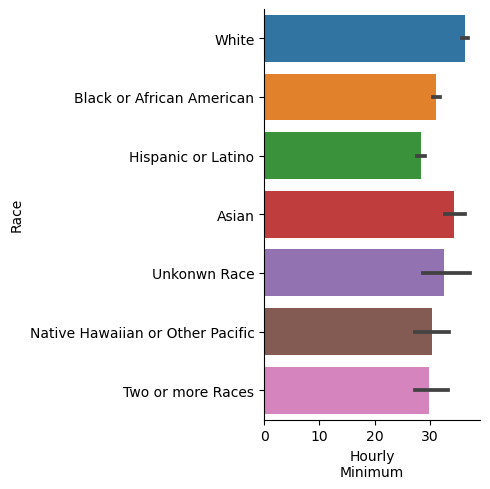

In [195]:
sns.catplot(x="Hourly\nMinimum", y="Race", data=Employee_sal, kind="bar")
plt.show()

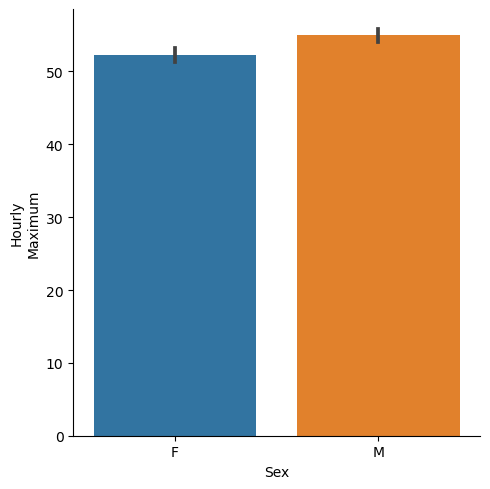

In [189]:
sns.catplot(x="Sex", y="Hourly\nMaximum", data=Employee_sal, kind="bar")
plt.show()

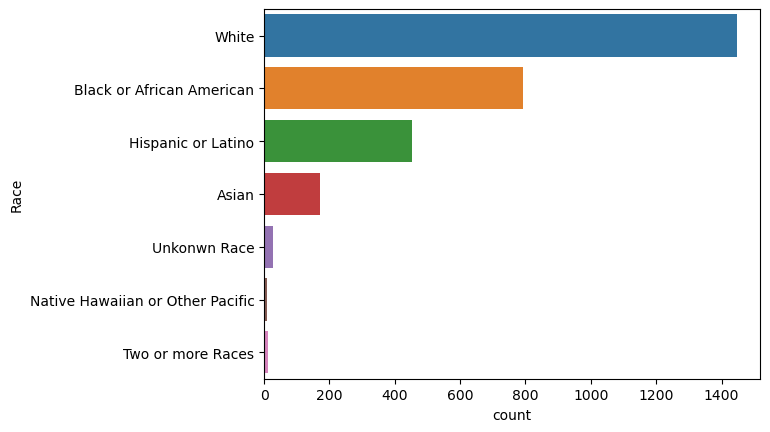

In [204]:
sns.countplot(y="Race", data=Employee_sal)
plt.show()